In [24]:
from pyo import *
s = Server().boot()
s.start()

In [25]:
wav = SquareTable() 
beat = Metro(time=0.125, poly=7).play()
envelope = CosTable([(0,0), (100,1), (500,.3), (8191,0)])
amplitude = TrigEnv(beat, table=envelope, dur=0.125, mul=0.5)
pitch = TrigXnoiseMidi(beat, dist=2, scale=5, mrange=(24, 12))

oscillator = Osc(table=wav, freq=pitch, mul=amplitude).out()


sig = LinTable([(0,20), (200,5), (1000,2), (8191,1)])
metro_synth = Metro(time=0.125, poly=5).play()
lfo = LFO(freq=4.2, sharp=0.2, type=4, mul=110, add=220)
envelope_synth = TrigEnv(metro_synth, table=sig, dur=0.5)

synth = FM(carrier=[220.5,220], ratio=[.2498,.2503], index=envelope_synth, mul=0.1).out()


lfd = Sine([0.4,0.2], mul=0.2, add=0.5)

synth_80 = SuperSaw(freq=440, detune=lfd, bal=8, mul=0.03).out()

In [26]:
s.start()

In [27]:

s.stop()

In [16]:
import librosa

import librosa.display
import matplotlib.pyplot as plt

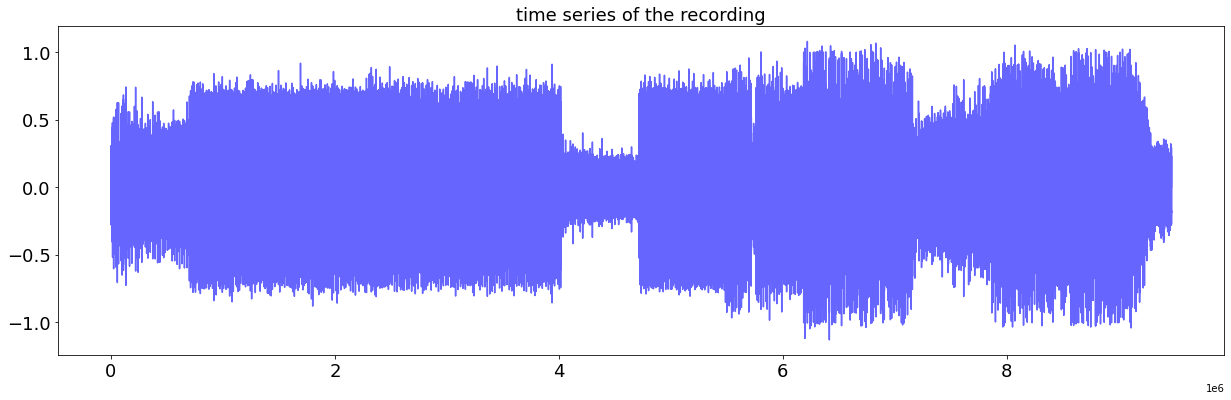

In [67]:
y, sr = librosa.load(mix1)

# plotting...
font_size = 18
plt.figure(1)
plt.figure(1).set_size_inches(18,6)
plt.figure(1).subplots_adjust(left=0.05, bottom=0.14, right=0.95, top=0.9, wspace=0.2, hspace=0.5)
plt.plot(y, color='blue', alpha=0.6)
plt.title('time series of the recording', fontsize=font_size)
plt.xticks(fontsize=font_size)
plt.yticks(fontsize=font_size)
plt.show()

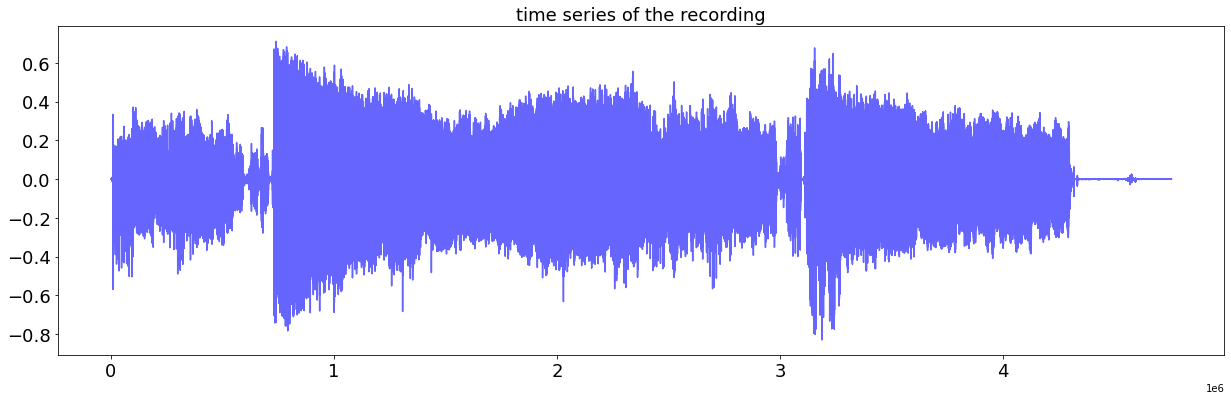

In [68]:
y, sr = librosa.load(sample1)

# plotting...
font_size = 18
plt.figure(1)
plt.figure(1).set_size_inches(18,6)
plt.figure(1).subplots_adjust(left=0.05, bottom=0.14, right=0.95, top=0.9, wspace=0.2, hspace=0.5)
plt.plot(y, color='blue', alpha=0.6)
plt.title('time series of the recording', fontsize=font_size)
plt.xticks(fontsize=font_size)
plt.yticks(fontsize=font_size)
plt.show()

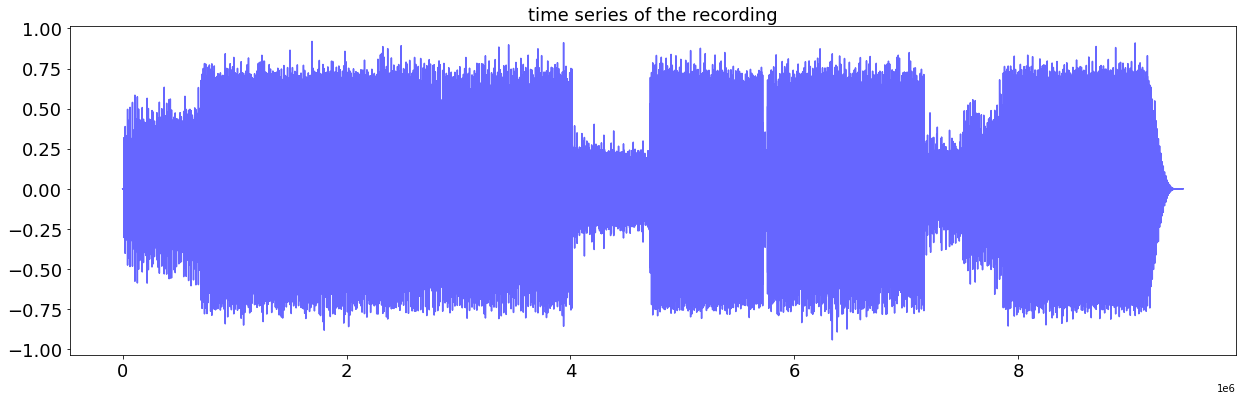

In [69]:
y, sr = librosa.load(sample2)

# plotting...
font_size = 18
plt.figure(1)
plt.figure(1).set_size_inches(18,6)
plt.figure(1).subplots_adjust(left=0.05, bottom=0.14, right=0.95, top=0.9, wspace=0.2, hspace=0.5)
plt.plot(y, color='blue', alpha=0.6)
plt.title('time series of the recording', fontsize=font_size)
plt.xticks(fontsize=font_size)
plt.yticks(fontsize=font_size)
plt.show()

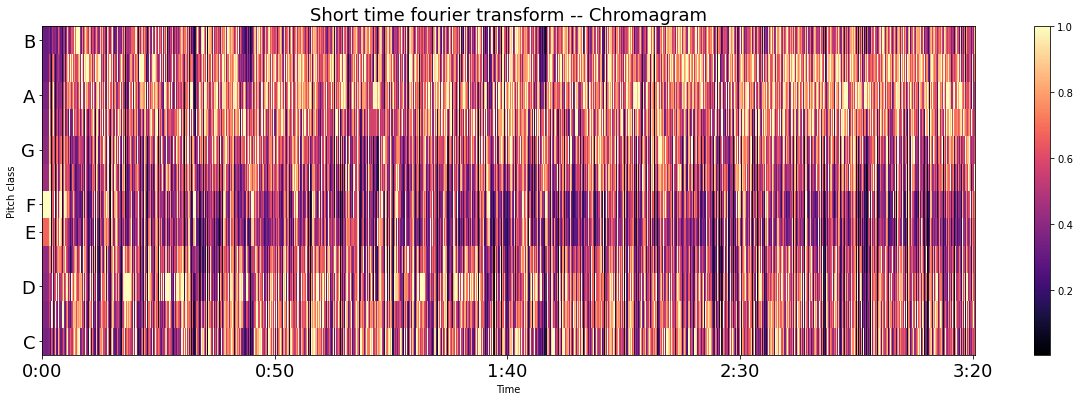

In [5]:
chroma = librosa.feature.chroma_stft(y=y, sr=sr)

# plotting...
plt.figure(2)
plt.figure(2).set_size_inches(18,6)
plt.figure(2).subplots_adjust(left=0.05, bottom=0.14, right=0.95, top=0.9, wspace=0.2, hspace=0.6)
librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
plt.title('Short time fourier transform -- Chromagram', fontsize=font_size)
plt.xticks(fontsize=font_size)
plt.yticks(fontsize=font_size)
plt.colorbar()
plt.show()

Tempo:  151.99908088235293 BPM


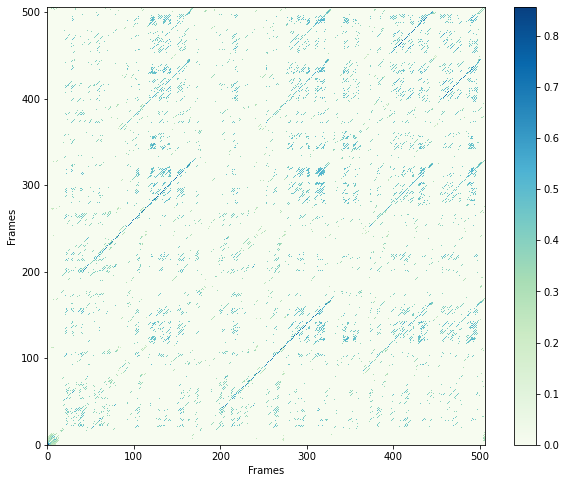

In [6]:

# onset envelope on y
onset_env = librosa.onset.onset_strength(y=y, sr=sr)

# tempo and beat detection on onset_env
tempo, beats = librosa.beat.beat_track(y=y, sr=sr, onset_envelope=onset_env, trim=False)
print ('Tempo: ', tempo, 'BPM')

# stft on y
stft = librosa.feature.chroma_stft(y=y, sr=sr)

# sync beats with stft
sync = librosa.util.sync(stft, beats)
chroma_stack = librosa.feature.stack_memory(sync, n_steps=5, mode='edge')

# similarity matrix of synced data
S = librosa.segment.recurrence_matrix(chroma_stack, sym=True, mode='affinity')

# plotting...
plt.figure(3)
plt.figure(3).set_size_inches(9,8)
plt.figure(3).subplots_adjust(left=0.05, bottom=0.14, right=0.95, top=0.9, wspace=0.2, hspace=0.6)
librosa.display.specshow(S, cmap='GnBu', x_axis='frames' , y_axis='frames')
plt.colorbar()
plt.show()

In [7]:
!pip install Pyo

In [8]:
from pyo import *


WxPython is not found for the current python version.
Pyo will use a minimal GUI toolkit written with Tkinter (if available).
This toolkit has limited functionnalities and is no more
maintained or updated. If you want to use all of pyo's
GUI features, you should install WxPython, available here:
http://www.wxpython.org/



In [28]:
s = Server().boot()
s.start()

In [29]:
### signal shape (in this case, a square wave)
wav = SquareTable()

### beat timing
beat = Metro(time=0.125, poly=5).play()
# beat = Beat(time=0.125, taps=64, poly=5).play()

### amplitude envelope shape
envelope = CosTable([(0,0), (100,1), (500,.3), (8191,0)])
# envelope = CurveTable([(0,0),(2048,.5),(4096,.2),(6144,.5),(8192,0)], 0, 20)

### amplitude
amplitude = TrigEnv(beat, table=envelope, dur=0.25, mul=0.6)

### random notes
pitch = TrigXnoiseMidi(beat, dist=3, scale=0, mrange=(96, 48))

In [30]:
oscillator = Osc(table=wav, freq=pitch, mul=amplitude).out()

In [31]:
oscillator.stop()

< Instance of Osc class >

In [13]:
### synth signal shape
sig = SawTable(order=12).normalize()
# sig = LinTable([(0,20), (200,5), (1000,2), (8191,1)])

### tempo
metro_synth = Metro(time=0.125, poly=2).play()

### LFO filter
lfo = LFO(freq=1.2, sharp=0.2, type=4, mul=110, add=220)

### synth envelope
envelope_synth = TrigEnv(metro_synth, table=sig, dur=0.5)

In [14]:
synth = FM(carrier=[220.5,220], ratio=[.2498,.2503], index=envelope_synth, mul=0.5).out()

In [15]:
synth = FM(carrier=lfo, ratio=[.2498,.2503], index=envelope_synth, mul=0.3).out()

In [16]:
synth.stop()

< Instance of FM class >

In [17]:
lfd = Sine([.4,.2], mul=.2, add=.5)
synth_80 = SuperSaw(freq=440, detune=lfd, bal=6, mul=0.2).out()

In [18]:
synth_80.stop()

< Instance of SuperSaw class >

In [19]:
s.stop()

In [2]:
import librosa
import madmom
from madmom.features.beats import *
from scipy import signal
import numpy as np



def peak_picking(beat_times, total_samples, kernel_size, offset):

    # smoothing the beat function
    cut_off_norm = len(beat_times)/total_samples*100/2
    b, a = signal.butter(1, cut_off_norm)
    beat_times = signal.filtfilt(b, a, beat_times)

    # creating a list of samples for the rnn beats
    beat_samples = np.linspace(0, total_samples, len(beat_times), endpoint=True, dtype=int)

    n_t_medians = signal.medfilt(beat_times, kernel_size=kernel_size)
    offset = 0.01
    peaks = []

    for i in range(len(beat_times)-1):
        if beat_times[i] > 0:
            if beat_times[i] > beat_times[i-1]:
                if beat_times[i] > beat_times[i+1]:
                    if beat_times[i] > (n_t_medians[i] + offset):
                        peaks.append(int(beat_samples[i]))
    return peaks


def analyze(y, sr):

    data = {}

    # sample rate
    data['sample_rate'] = sr

    # getting duration in seconds
    data['duration'] = librosa.get_duration(y=y, sr=sr)

    # beats prediction
    # rnn_processor = RNNBeatProcessor()
    # beats = rnn_processor(y)

    rnn_processor = RNNBeatProcessor(post_processor=None)
    predictions = rnn_processor(y)
    mm_processor = MultiModelSelectionProcessor(num_ref_predictions=None)
    beats = mm_processor(predictions)

    data['beat_samples'] = peak_picking(beats, len(y), 5, 0.01)

    if len(data['beat_samples']) < 3:
        data['beat_samples'] = peak_picking(beats, len(y), 25, 0.01)

    if data['beat_samples'] == []:
        data['beat_samples'] = [0]

    data['number_of_beats'] = len(data['beat_samples'])

    # tempo
    data['tempo_float'] = (len(data['beat_samples'])-1)*60/data['duration']
    data['tempo_int'] = int(data['tempo_float'])


    # noisiness featues
    data['zero_crossing'] = librosa.feature.zero_crossing_rate(y)[0].tolist()
    data['noisiness_median'] = float(np.median(data['zero_crossing']))
    data['noisiness_sum'] = sum( librosa.zero_crossings(y)/y.shape[0] )

    # spectral features
    notes = []

    try:
        chroma = librosa.feature.chroma_cqt(y, n_chroma=12, bins_per_octave=12, n_octaves=8, hop_length=512)

        # CONVERSION TABLE
        # 0     c	  261.63
        # 1     c#	  277.18
        # 2	    d	  293.66
        # 3	    d#	  311.13
        # 4	    e	  329.63
        # 5	    f	  349.23
        # 6	    f#	  369.99
        # 7	    g	  392.00
        # 8	    g#	  415.30
        # 9	    a	  440.00
        # 10	a#	  466.16
        # 11	b	  493.88

        for col in range(chroma.shape[1]):
            notes.append(int(np.argmax(chroma[:,col])))

        data['notes'] = notes
        data['dominant_note'] = int(np.argmax(np.bincount(np.array(notes))))
    except:
        data['notes'] = [0]
        data['dominant_note'] = 0

    return data


In [3]:
import os
path = os.path.join('mix1.wav')

def analyze_file(path, sr=22050):
    import librosa
    y, sr = librosa.load(path, sr=sr)
    return analyze(y, sr)


def analyze_samples(y, sr=22050):
    return analyze(y, sr)

def get_waveform(path, sr=22050):
    import librosa
    y, sr = librosa.load(path, sr=sr)
    return y

y = get_waveform(path)
data = analyze_file(path)

C:\Users\Daniel Perez\anaconda3\lib\site-packages\librosa\core\audio.py:569: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.pad((y_sign[slice_post] != y_sign[slice_pre]),
C:\Users\Daniel Perez\anaconda3\lib\site-packages\librosa\util\utils.py:1725: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if np.issubdtype(x.dtype, float) or np.issubdtype(x.dtype, complex):
C:\Users\Daniel Perez\anaconda3\lib\site-packages\librosa\util\utils.py:991: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array inde

In [4]:
data_sample = analyze_samples(y)

In [5]:
waveform = y

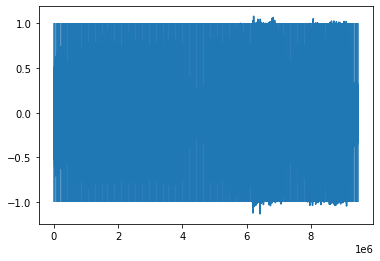

In [6]:
import matplotlib.pyplot as plt

plt.figure()
plt.vlines(data['beat_samples'], -1.0, 1.0)
plt.plot(waveform)
plt.show()

In [7]:
data

{'sample_rate': 22050,
 'duration': 429.47600907029477,
 'beat_samples': [0,
  44542,
  88203,
  109813,
  131863,
  153473,
  175083,
  197134,
  240794,
  262404,
  284455,
  306065,
  328116,
  349726,
  371776,
  393386,
  414996,
  437047,
  458657,
  469682,
  480707,
  491733,
  513343,
  535393,
  557003,
  579054,
  600664,
  611689,
  622715,
  644325,
  655350,
  666375,
  676960,
  687985,
  699011,
  720620,
  742230,
  764281,
  785891,
  807942,
  829551,
  851602,
  873212,
  894822,
  916873,
  938482,
  960533,
  982143,
  1004194,
  1025804,
  1047855,
  1069464,
  1091515,
  1113125,
  1135176,
  1156786,
  1178836,
  1200446,
  1222056,
  1244107,
  1265717,
  1287768,
  1309377,
  1331428,
  1353038,
  1375089,
  1396699,
  1418749,
  1440359,
  1462410,
  1484020,
  1506071,
  1527680,
  1549731,
  1571341,
  1592951,
  1615002,
  1636612,
  1658662,
  1680272,
  1702323,
  1723933,
  1745984,
  1767593,
  1789644,
  1811254,
  1833305,
  1854915,
  1876965,
  18

In [31]:
!pip install pydub

In [32]:
import librosa
import numpy as np
from pydub import AudioSegment
from pydub.utils import which
import time
from random import randint

def find_best_sync_point(bottom_file_beats, top_file_beats, max_mix_sample, offset, mode):

    offset = offset
    matches_per_round = []

    # turning args to numpy arrays
    bottom_file_beats = np.array(bottom_file_beats)
    top_file_beats = np.array(top_file_beats)

    for rn in range(bottom_file_beats.shape[0]):

        try:

            zero_sync_samples = bottom_file_beats[rn] - top_file_beats[0]
            slider = top_file_beats + (zero_sync_samples)

            for i in range(len(slider)):
                if slider[i] <= max_mix_sample:
                    continue
                else:
                    slider[i] = slider[i] - max_mix_sample

            matches = []
            tested_beat_index = 0
            all_sample_beats = np.concatenate((slider, bottom_file_beats))
            all_sample_beats.sort()

            for i in range (1, all_sample_beats.shape[0]):
                if all_sample_beats[i] == all_sample_beats[tested_beat_index] or abs(all_sample_beats[i] - all_sample_beats[tested_beat_index]) <= offset:
                    matches.append(all_sample_beats[i])
                    matches.append(all_sample_beats[tested_beat_index])
                    tested_beat_index+=1

                else:
                    tested_beat_index+=1

            matches_per_round.append(len(matches)/2/len(top_file_beats))

        except Exception as err:
            # exc_type, exc_value, exc_traceback = sys.exc_info()
            # print ('\t🔎  We had a sliding window problem :|\n\tError message: {}\n\tError on file: {}\n\tError on line: {}\n'.format(err, exc_traceback.tb_frame.f_code.co_filename, exc_traceback.tb_lineno))
            matches_per_round.append(0)

    if mode == 'first':
        sync_beat_number = np.argmax(matches_per_round)

    else: # random (default)
        sync_beat_number = np.random.choice(np.argwhere(matches_per_round == np.amax(matches_per_round)).reshape(-1,))

    sync_sample = bottom_file_beats[sync_beat_number] - top_file_beats[0]
    sync_beat_accuracy = np.max(matches_per_round)

    return sync_sample, sync_beat_number, sync_beat_accuracy





def mixer(top_file, bottom_file, output_file_path, sr=22050, mix_mode='random', offset=880, trim_silence=False, sync_sample=None, timestamp=None):

    # loading top file
    y_top_file, sr = librosa.load(top_file, sr=sr)

    if trim_silence:
        try:
            yt, i = librosa.effects.trim(y_top_file, top_db=28)

            # trimming only the leading silence
            y_top_file = y_top_file[i[0]:]
        except:
            print ('Failed to trim leading silence')
            pass

    # loading bottom file
    y_bottom_file, sr = librosa.load(bottom_file, sr=sr)

    # checking if the durations allow proper mixing
    y_bottom_file_repetitions = 1
    while (y_bottom_file.shape[0] * y_bottom_file_repetitions) < y_top_file.shape[0] :
        y_bottom_file_repetitions+=1

    # repeating y_bottom_file if needed
    if (y_bottom_file_repetitions > 1):
        y_bottom_file_duplications = []
        for i in range(y_bottom_file_repetitions):
            y_bottom_file_duplications.append(y_bottom_file)
        y_bottom_file = np.hstack((y_bottom_file_duplications))


    # analyzing the files
    top_file_data = analyze_samples(y_top_file, sr)
    bottom_file_data = analyze_samples(y_bottom_file, sr)

    # find mixing point
    sync_sample, sync_beat_number, sync_beat_accuracy = find_best_sync_point(
                                                        top_file_beats=top_file_data['beat_samples'],
                                                        bottom_file_beats=bottom_file_data['beat_samples'],
                                                        max_mix_sample=y_bottom_file.shape[0],
                                                        offset=offset,
                                                        mode=mix_mode)


    # mix the files
    sync_time_ms = sync_sample / sr * 1000

    # loading files as pydub audiosegments
    sound_seg = AudioSegment.from_file(top_file)
    mix_seg = AudioSegment.from_file(bottom_file)

    if sync_time_ms < 0:

        position = (bottom_file_data['duration'] * 1000) + sync_time_ms
        played_togther = mix_seg.overlay(sound_seg[:abs(int(sync_time_ms))], position=position, loop=False)
        new = played_togther
        played_togther = new.overlay(sound_seg[abs(int(sync_time_ms)):], position=0, loop=False)

        del new
        del position

    elif (sync_time_ms + (top_file_data['duration'] * 1000)) > (bottom_file_data['duration'] * 1000):

        sound_cut_point = int(bottom_file_data['duration']*1000 - sync_time_ms)

        # mixing sound and mix at 2 points
        played_togther = mix_seg.overlay(sound_seg[:sound_cut_point], position=int(sync_time_ms), loop=False)
        new = played_togther
        played_togther = new.overlay(sound_seg[sound_cut_point:], position=0, loop=False)

        del new

    else:

        # mixing sound and mix at sync_time_ms
        played_togther = mix_seg.overlay(sound_seg, position=sync_time_ms, loop=False)

    # clearning audio segment from the memory
    del mix_seg
    del sound_seg

    # levelizing the final output
    if played_togther.max_dBFS >= 0:
        played_togther = played_togther.apply_gain(0-played_togther.max_dBFS)
    else:
        played_togther = played_togther.apply_gain(-1 * played_togther.max_dBFS)

    # saving the output file locally
    file_handle = played_togther.export(output_file_path, format='wav')

    return sync_beat_accuracy

In [65]:
import os
sample1 = os.path.join('sample1.wav')
sample2 = os.path.join('sample2.wav')
sample3 = os.path.join('sample3.wav')
mix1 = os.path.join('mix1.wav')
mix2 = os.path.join('mix2.wav')

In [66]:
mixer(mix1, sample3, mix2)

0.08944954128440367

In [7]:
!pip install pymusiclooper

  Created wheel for mpg123: filename=mpg123-0.4-py3-none-any.whl size=2863 sha256=3dc61fb67a366a782289fac3365d8e6dc4449212637adc8528900ac4ca40b1d7
  Stored in directory: c:\users\daniel perez\appdata\local\pip\cache\wheels\f6\e5\05\e5d1bf7a9532c424214da578b3c243095979198864b4387f00
Successfully built mpg123


In [25]:
import pymusiclooper

help(pymusiclooper)


Help on package pymusiclooper:

NAME
    pymusiclooper

DESCRIPTION
    PyMusicLooper
    Copyright (C) 2021  Hazem Nabil
    
    This program is free software: you can redistribute it and/or modify
    it under the terms of the GNU General Public License as published by
    the Free Software Foundation, either version 3 of the License, or
    any later version.
    
    This program is distributed in the hope that it will be useful,
    but WITHOUT ANY WARRANTY; without even the implied warranty of
    MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
    GNU General Public License for more details.
    
    You should have received a copy of the GNU General Public License
    along with this program.  If not, see <https://www.gnu.org/licenses/>.

PACKAGE CONTENTS
    __main__
    argparser
    core
    exceptions

VERSION
    2.4.0

FILE
    c:\users\daniel perez\anaconda3\lib\site-packages\pymusiclooper\__init__.py




AttributeError: module 'pymusiclooper' has no attribute '__main__'